In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

valToSelect=1
featureToSelect="race"
#helperFeatsDrop=[featureToSelect]+["mental_illness_type_anorexia_nervosa",
#"mental_illness_type_bipolar_disorder",
#"mental_illness_type_bulimia_nervosa",
#"mental_illness_type_depression",
#"mental_illness_type_ptsd_posttraumatic_stress_disorder",
#"mental_illness_type_schizophrenia",
#"mental_illness_type_substance_abuse",
#'depression_bipolar_schizophrenia'] # mental_illness
#helperFeatsDrop=[featureToSelect]+['cancer_treatment'] #'cancer'
#helperFeatsDrop=[featureToSelect]+['height_cm','weight_kg'] #'bmi_corrected'
helperFeatsDrop=[featureToSelect] #'lung_disease'
helperFeatsDrop=[featureToSelect]+['country'] #'race'
#helperFeatsDrop=[featureToSelect] #'liver_disease'
#helperFeatsDrop=[featureToSelect]+['diabetes_type'] # diabetes
#helperFeatsDrop=[featureToSelect]+['ibd_diagnosis_refined','ibd_diagnosis'] # ibd

agpDF=pd.read_csv("resultsKNNImputationOnAGPmetadata.csv",low_memory=False)
agpDF=agpDF.set_index(["sample_name","host_subject_id"])

yDF=pd.DataFrame(agpDF[featureToSelect])
yDF

agpDF=agpDF.drop(helperFeatsDrop, axis=1)

X_train, X_val, y_train, y_val = train_test_split(agpDF, yDF, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_val.shape)

(15551, 140)
(3888, 140)


In [42]:
##DONT DO ABOVE, DO THIS FROM NOW ON, ITS THE IMPUTED WITHOUT LEAKS
agpDFTRAIN=pd.read_csv("resultsKNNImputationOnAGPmetadataTRAIN80.csv",low_memory=False)
agpDFTRAIN=agpDFTRAIN.set_index(["sample_name","host_subject_id"])
agpDFTEST=pd.read_csv("resultsKNNImputationOnAGPmetadataTEST20.csv",low_memory=False)
agpDFTEST=agpDFTEST.set_index(["sample_name","host_subject_id"])

agpNewDF=pd.concat([agpDFTRAIN,agpDFTEST])
agpNewDF=agpNewDF.reset_index()
agpNewDF=agpNewDF.drop_duplicates(subset=['host_subject_id'], keep='first')
agpNewDF=agpNewDF.set_index(['sample_name','host_subject_id'])

yDF=pd.DataFrame(agpNewDF[featureToSelect])

agpNewDF=agpNewDF.drop(helperFeatsDrop, axis=1)

X_train, X_val, y_train, y_val = train_test_split(agpNewDF, yDF, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_val.shape)

(13229, 139)
(3308, 139)


C:\Users\Ryan\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.8775695284159613
0.16293833131801694
0.16293833131801694
Wall time: 883 ms


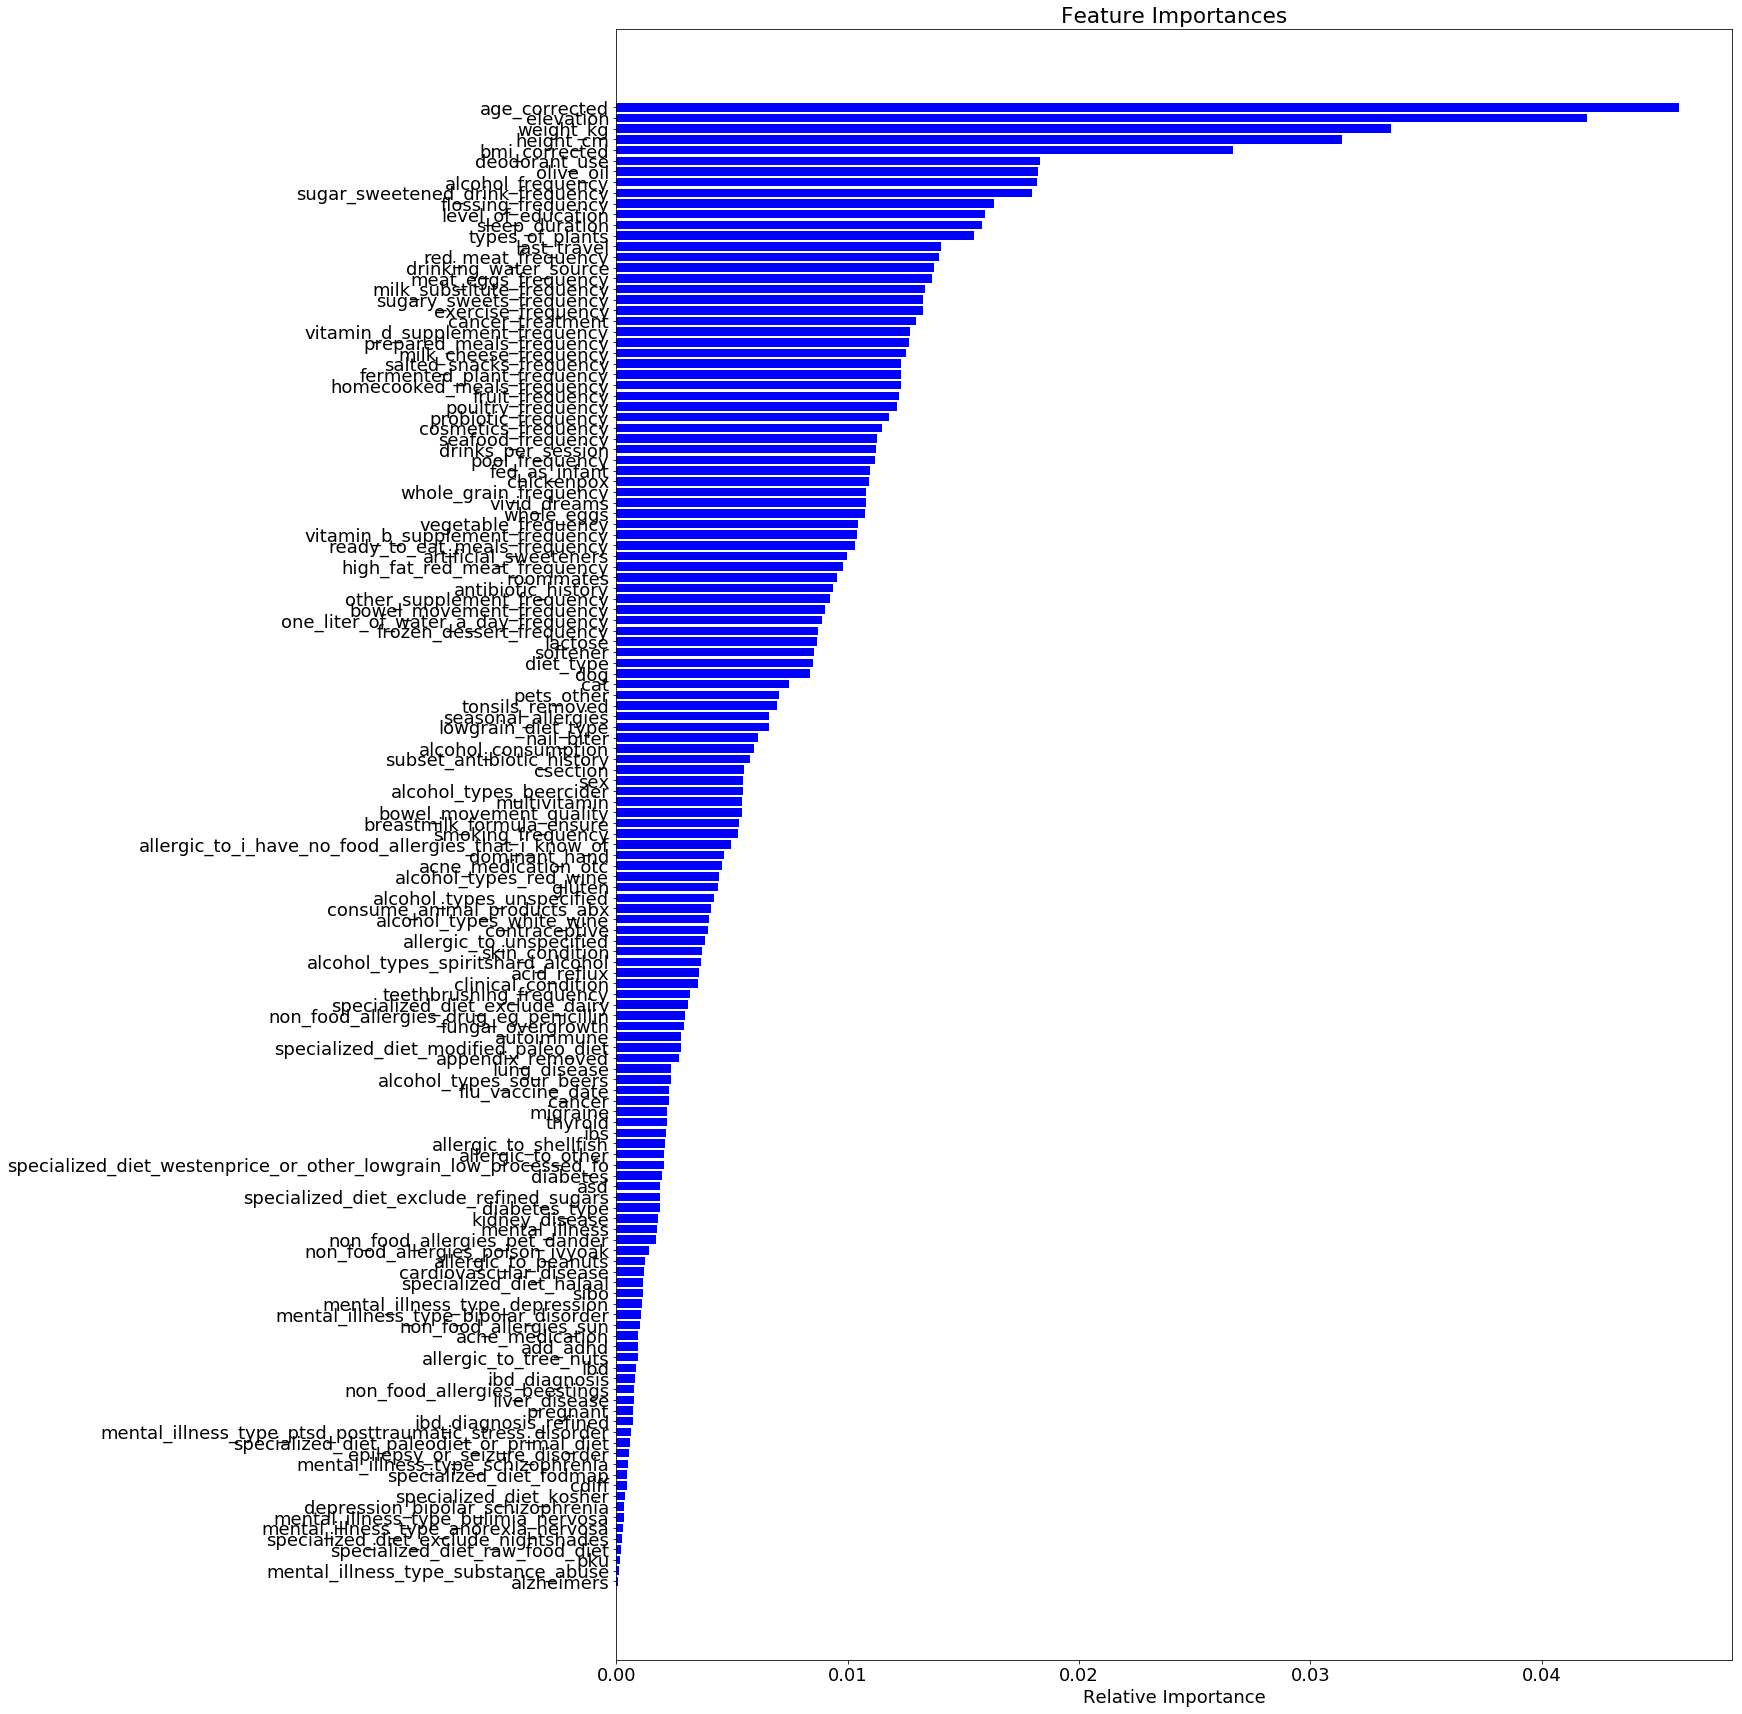

In [43]:
%%time
#Let me begin with a simple RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

clf = RandomForestClassifier(criterion='entropy',n_jobs=-1,n_estimators=10)#,max_leaf_nodes=25,max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
y_train_pred = clf.predict(X_train)

print (accuracy_score(y_pred, y_val))
print (mean_absolute_error(list(map(int,y_pred)), y_val))
print (mean_absolute_error(y_pred, y_val))
#print("Precision: " + str(precision_score(y_val, y_pred, average='binary')))
#print("Recall: " + str(recall_score(y_val, y_pred, average='binary')))
#print("F1 Score: " + str(f1_score(y_val, y_pred, average='binary')))
#print("Precision: " + str(precision_score(y_val, y_pred, average='macro')))
#print("Recall: " + str(recall_score(y_val, y_pred, average='macro')))
#print("F1 Score: " + str(f1_score(y_val, y_pred, average='macro')))

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,30))
plt.rcParams.update({'font.size': 18})
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

(array([2.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.950e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.903e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        9.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.        , -2.83333333, -2.66666667, -2.5       , -2.33333333,
        -2.16666667, -2.        , -1.83333333, -1.66666667, -1.5       ,
        -1.33333333, -1.16666667, -1.        , -0.83333333, -0.66666667,
        -0.5       , -0.33333333, -0.16666667,  0.        ,  0.16666667,
         0.33333333,  0.5       ,  0.66666667,  0.83333333,  1.        ,
         1.16666667,  1.33333333,  1.5       ,  1.66666667,  1.83333333,
         2.        ]),
 <a list of 30 Patch objects>)

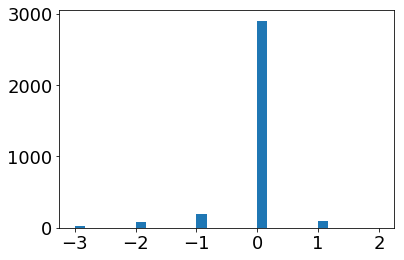

In [36]:
#for i in range(0,25):
#    print('pred ' + str(y_pred[i]))
#    print('val  ' + str(y_val['age_corrected'][i]) + '\n')
    
import matplotlib.pyplot as plt

plt.hist(y_pred-y_val['race'], bins=30)

In [46]:
raceAns={'Caucasian':1,
'Asian or Pacific Islander':2,
'Other':0,
'Hispanic':3,
'Not provided':np.nan,
'African American':4,
'Unspecified':np.nan}
print(y_val['race'].value_counts())
pd.Series(y_pred).value_counts()

1.0    2890
2.0     209
0.0      99
3.0      86
4.0      24
Name: race, dtype: int64


1.0    3291
2.0      14
0.0       3
dtype: int64

In [71]:
agpDFTRAIN=pd.read_csv("resultsKNNImputationOnAGPmetadataTRAIN80.csv",low_memory=False)
agpDFTRAIN=agpDFTRAIN.set_index(["sample_name","host_subject_id"])
agpDFTEST=pd.read_csv("resultsKNNImputationOnAGPmetadataTEST20.csv",low_memory=False)
agpDFTEST=agpDFTEST.set_index(["sample_name","host_subject_id"])

agpNewDF=pd.concat([agpDFTRAIN,agpDFTEST])
agpNewDF=agpNewDF[agpNewDF['ibd']==1]
print(agpNewDF['bowel_movement_frequency'].value_counts())

 1.0    477
 0.0    370
-2.0      2
Name: autoimmune, dtype: int64


In [72]:
#Original data to compare against above 'with imputed' ones
dietDF = pd.read_csv("cleanedUpMetadata_noVio_AGP_humfece.csv",low_memory=False)
dietDFNewDF=dietDF[dietDF['ibd']==1]
print(dietDFNewDF['bowel_movement_frequency'].value_counts())

1.0    465
0.0    356
Name: autoimmune, dtype: int64
